# Morphology

## 1. Disguise proper names in an email

In [ ]:
email = """
Уважаемая Эльвира Геннадьевна,

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: Льва Толстого, 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь Гагарина, 99
№10 улица Южная, 10

С уважением,
Алексей Мартынов.
"""

In [ ]:
! pip install -q pymystem3

In [ ]:
from pymystem3 import Mystem

mystem = Mystem()

lines = email.split('\n')

def is_proper_name(word):
    parsed_word = mystem.analyze(word)[0]
    if 'analysis' in parsed_word and len(parsed_word['analysis']) > 0 and 'gr' in parsed_word['analysis'][0]:
        gr = parsed_word['analysis'][0]['gr']
        if 'имя' in gr or 'фам' in gr or 'отч' in gr or 'гео' in gr:
            return True
    return False

last_word_was_proper_name = False

for i in range(len(lines)):
    words = lines[i].split()
    for j in range(len(words)):
        if is_proper_name(words[j]) or 'улица' in words[j - 1]:
          if last_word_was_proper_name == False:
            words[j] = '[ИМЯ]'
          else:
            words[j] = ''
          last_word_was_proper_name = True
        else:
          last_word_was_proper_name = False
    lines[i] = ' '.join(words)

masked_email = '\n'.join(lines)

print(masked_email)


Уважаемая [ИМЯ] 

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: [ИМЯ]  42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь [ИМЯ] 99
№10 улица [ИМЯ] 10

С уважением,
[ИМЯ] 



## 2. Replace pymorphy selected object in the wikipedia article with another object (with a declination)

In [ ]:
# Example of input data
orig_wikitext = """Стрекозы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. Стрекозы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая Антарктиду.
Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые стрекозы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их называют также нимфами или наядами) развиваются в водоёмах различных типов — главным образом в стоячих озёрах, прудах и старицах рек, а также в ручьях, реках и болотистых водоёмах, вплоть до созданных человеком прудов и канав с водой. Как и взрослые стрекозы, личинки являются хищниками. Они охотятся на водных насекомых и прочих беспозвоночных.
Стрекозы имеют большое значение для человека. Велика их роль в регуляции численности кровососущих насекомых, ряда насекомых-вредителей сельского и лесного хозяйства. В некоторых случаях личинки стрекоз могут приносить вред, например, уничтожая мальков в рыбоводных прудах либо составляя им пищевую конкуренцию. Кроме того, личинки некоторых видов могут являться промежуточными хозяевами гельминтов."""

# Example of output data
result_wikitext = """Годзиллы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. Годзиллы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая антарктиду. 
Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые годзиллы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их называют также нимфами или наядами) развиваются в водоёмах различных типов — главным образом в стоячих озёрах, прудах и старицах рек, а также в ручьях, реках и болотистых водоёмах, вплоть до созданных человеком прудов и канав с водой. Как и взрослые годзиллы, личинки являются хищниками. Они охотятся на водных насекомых и прочих беспозвоночных. 
Годзиллы имеют большое значение для человека. Велика их роль в регуляции численности кровососущих насекомых, ряда насекомых- вредителей сельского и лесного хозяйства. В некоторых случаях личинки годзилл могут приносить вред, например, уничтожая мальков в рыбоводных прудах либо составляя им пищевую конкуренцию. Кроме того, личинки некоторых видов могут являться промежуточными хозяевами гельминтов."""

In [ ]:
import pymorphy2
import re

original_word = "стрекоза"
replacement_word = "годзилла"

morph = pymorphy2.MorphAnalyzer()

def get_forms(word):
  word_lexemes = morph.parse(word)[0].lexeme
  word_lexemes_words = [word_lexeme.word for word_lexeme in word_lexemes]
  word_lexemes_words += [word.title() for word in word_lexemes_words]

  return word_lexemes_words

orig_forms = get_forms(original_word)
repl_forms = get_forms(replacement_word)

result_wikitext = orig_wikitext
for index, word_form in enumerate(orig_forms):
  result_wikitext = re.sub(r'\b' + word_form + r'\b', repl_forms[index], orig_wikitext)

print(result_wikitext)

Стрекозы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. Стрекозы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая Антарктиду.
Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые стрекозы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их называют также нимфам

## 3. Comparison of morphological analyzers

In [ ]:
! pip install -q natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pymorphy2
import natasha

# text = "Дома дружнее всего, друзьям дружнее всегда."
text = """Стрекозы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. Стрекозы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая Антарктиду.
Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые стрекозы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их называют также нимфами или наядами) развиваются в водоёмах различных типов — главным образом в стоячих озёрах, прудах и старицах рек, а также в ручьях, реках и болотистых водоёмах, вплоть до созданных человеком прудов и канав с водой. Как и взрослые стрекозы, личинки являются хищниками. Они охотятся на водных насекомых и прочих беспозвоночных.
Стрекозы имеют большое значение для человека. Велика их роль в регуляции численности кровососущих насекомых, ряда насекомых-вредителей сельского и лесного хозяйства. В некоторых случаях личинки стрекоз могут приносить вред, например, уничтожая мальков в рыбоводных прудах либо составляя им пищевую конкуренцию. Кроме того, личинки некоторых видов могут являться промежуточными хозяевами гельминтов."""

morph1 = pymorphy2.MorphAnalyzer()
morph2 = natasha.MorphVocab()

def process_text(morph_analyzer):
  lemmas = []
  tags = []
  for token in text.split():
    parse_result = morph_analyzer.parse(token)[0]
    # normal_form property will be the same in both analyzers
    if 'MorphVocab' == type(morph_analyzer).__name__:
      lemmas.append(parse_result.normal)
    else:
      lemmas.append(parse_result.word)
    tags.append(parse_result.tag)

  return lemmas, tags

lemmas1, tags1 = process_text(morph1)
lemmas2, tags2 = process_text(morph2)

j = 0
for i in range(len(text.split())):
  if lemmas1[i] != lemmas2[i]:
      print(f"Токен: {text.split()[i]}")
      print(f"Лемма (pymorphy2): {lemmas1[i]}")
      print(f"Лемма (natasha): {lemmas2[i]}")
      print(f"Теги (pymorphy2): {tags1[i]}")
      print(f"Теги (natasha): {tags2[i]}")
      print("-" * 80)
      j += 1
  if j > 2:
    break

Токен: Стрекозы
Лемма (pymorphy2): стрекозы
Лемма (natasha): стрекоза
Теги (pymorphy2): NOUN,anim,femn sing,gent
Теги (natasha): NOUN,anim,femn sing,gent
--------------------------------------------------------------------------------
Токен: древних
Лемма (pymorphy2): древних
Лемма (natasha): древний
Теги (pymorphy2): ADJF,Qual plur,gent
Теги (natasha): ADJF,Qual plur,gent
--------------------------------------------------------------------------------
Токен: летающих
Лемма (pymorphy2): летающих
Лемма (natasha): летать
Теги (pymorphy2): PRTF,impf,intr,pres,actv plur,gent
Теги (natasha): PRTF,impf,intr,pres,actv plur,gent
--------------------------------------------------------------------------------


## 4. Token visualization

In [ ]:
! wget -q https://www.dropbox.com/s/ug0b4pvuynwj4pe/news_science.zip && unzip -q news_science.zip

In [ ]:
import glob
import pandas as pd
from tqdm import tqdm


data = []
for path in glob.glob('./news_science/*'): # paths are [./news_science/news1_txt, ./news_science/sci.comp_txt]
  texts = []
  for filename in tqdm(glob.glob(path + '/*.txt')):
    texts.append(open(filename, 'r').read().strip()) # append trimmed content of each file in path to texts
  
  data.append(pd.DataFrame({'text': texts})) # append dataframe
  # get first 3 letters from last chain of path (news1_txt or sci.comp_txt) result: 'new' or 'sci'
  # and add column genre to the last dataframe in list
  data[-1]['genre'] = path.split('/')[-1][:3]

data = pd.concat(data) # data was a list of dataframes, now it is dataframe itself
data.sample(3)

100%|██████████| 79/79 [00:00<00:00, 8298.27it/s]


,text,genre
30,В Сан-Франциско прошло технологическое шоу Tec...,new
33,Руководство социальной сети «ВКонтакте» опрове...,new
29,﻿\nВЫЧИСЛИТЕЛЬНЫЕ АСПЕКТЫ ИМИТАЦИОННОГО МОДЕЛИ...,sci


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
# nltk.download('punkt') # instruments for tokenization into words and sentances

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenize
# the following regular expression is equivalent to apply
# re.sub(r'[^\w\s]', '', text) and then re.sub(r'\s+', ' ', text)
# replace_spaces = lambda match: ' ' if match.group(0).isspace() else ''
# clean_text_fn = lambda text: re.sub(r'[^\w\s]|(\s+)', replace_spaces, text)
# data["text_cleaned"] = data["text"].apply(clean_text_fn)

# data["text_cleaned"] = data["text"].apply(lambda text: re.sub(r'[^\S\n]+', ' ', text))
data["text_cleaned"] = data["text_cleaned"].apply(lambda text: re.sub(r'[^\S\n]+', ' ', text))
data["text_cleaned"] = data["text_cleaned"].apply(lambda text: re.sub(r'\n', '. ', text))
data["text_cleaned"] = data["text_cleaned"].apply(lambda text: re.sub(r'\s\.', '. ', text))
data["text_cleaned"] = data["text_cleaned"].apply(lambda text: text.lower())

sentences = nltk.sent_tokenize(' '.join(data["text_cleaned"]))
tokenized_sentences = []
stop_words = set(stopwords.words('russian'))
for sentence in sentences:
  words = nltk.word_tokenize(re.sub(r'[^\w\s\-]', '', sentence))
  filtered_words = [word for word in words if word not in stop_words]
  tokenized_sentences.append(filtered_words)

print(tokenized_sentences)
data.sample(3)

[['иа'], ['коськин'], ['магистрант'], ['учебно-научно-исследовательский', 'институт', 'информационных', 'технологий'], ['приокский', 'государственный', 'университет', 'г', 'орёл', 'российская', 'федерация'], ['моделирование', 'процесса', 'оценки', 'ситуации', 'принятии', 'решений', 'коллекционных', 'карточных', 'играх'], ['аннотация'], ['статье', 'рассматриваются', 'вопросы', 'моделирования', 'взаимодействия', 'игровых', 'объектов'], ['классических', 'коллекционных', 'карточных', 'играх'], ['рассматриваются', 'простой', 'расширенный', 'методы', 'динамического', 'моделирования'], ['описывается', 'специфический'], ['метод', 'кластеризации', 'игровых', 'объектов', 'построены', 'оценочные', 'кривые', 'стоимости'], ['различных', 'игровых', 'ситуаций'], ['материал', 'полезен', 'разработке', 'игровых'], ['компьютерных', 'роботов', 'ключевые', 'слова'], ['оценка', 'игровой', 'ситуации', 'карточные', 'игры', 'моделирование', 'динамический', 'метод'], ['кластеризация', 'компьютерные', 'игроки', 

,text,genre,text_cleaned
15,Административный суд Кёльна снял с последнего ...,new,административный суд кёльна снял с последнего ...
32,"﻿УДК 004.4: 004.94, 001.89 \nГ. П. Пуха, П. В...",sci,"﻿удк 004.4: 004.94, 001.89. г. п. пуха, п. в. ..."
37,Адвокат семьи убитого москвича Ивана Агафонова...,new,адвокат семьи убитого москвича ивана агафонова...


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Создание экземпляра модели Word2Vec
model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

# Обучение модели на вашем корпусе текста (список списков токенов)
model.build_vocab(tokenized_sentences)
model.train(data["text_cleaned"], total_examples=len(data["text_cleaned"]), epochs=10)

(4272112, 9774420)

In [ ]:
import random
# all_tokens = []
# for sentence in tokenized_sentences:
#     for token in sentence:
#         all_tokens.append(token)
# random_tokens = ['кошка', 'собака']
random_tokens = random.sample([token for sentence in tokenized_sentences for token in sentence], 100)
print(random_tokens)

['консервативность', 'вопросе', 'валюты', 'протестное', 'митчелла', 'используются', 'кафедры', 'техническими', 'уменьшив', 'авторах', 'достичь', 'захочет', 'косово', 'распределения', 'типу', 'бизнесом', 'электронный', 'информационного', 'системах', 'данные', '2', 'целей', 'китаю', 'фирма', 'используемая', '112', 'обучения', 'транспортных', 'высокий', 'ещё', 'наказание', 'решения', 'бянкин', 'эффективную', 'рамках', 'риском', 'невозможность', 'ремонта', 'протекающих', 'решения', 'оба', 'материя', 'просмотра', 'кривой', 'альтернатив', 'долей', 'серыми', 'тераэлектронвольт', 'рисунок', 'вывел', 'перевода', 'государства', 'on', 'отталкивал', 'ценности', '2', 'шкалы', 'строительство', 'pt', 'функционирования', 'сформулированы', 'самоорганизацией', 'этому', 'научными', 'количество', 'время', 'частности', 'данных', 'позволяющие', 'диагональ', '1', 'учебе', 'имитационном', 'задавать', 'сезоне', 'именно', 'изготавливаем', 'x', 'столе', 'доцент', 'средним', 'лондоне', 'образом', 'систем', 'систе

In [ ]:
# checking if all the tokens are present in the model
# some words can be absent if min_count > 1 
for word in random_tokens:
    if word not in model.wv.key_to_index:
        print(f'The word "{word}" is absent from Word2Vec.')
        raise SystemExit
print('all tokens are present in Word2Vec')

all tokens are present in Word2Vec


In [ ]:
vectors = [model.wv[word] for word in random_tokens]

In [ ]:
import numpy as np

# Преобразование списка vectors в массив NumPy
vectors_np = np.array(vectors)

# Applying of t-SNE algorithm
tsne = TSNE(n_components=2, random_state=0)
embedded = tsne.fit_transform(vectors_np)

In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def get_pos_from_token(token):
    parsed_token = morph.parse(token)[0]
    pos = parsed_token.tag.cyr_repr
    return pos.lower() if pos else None

print('the word "' + random_tokens[1] + '" is a ' + get_pos_from_token(random_tokens[1]))

the word "вопросе" is a сущ,неод,мр ед,пр


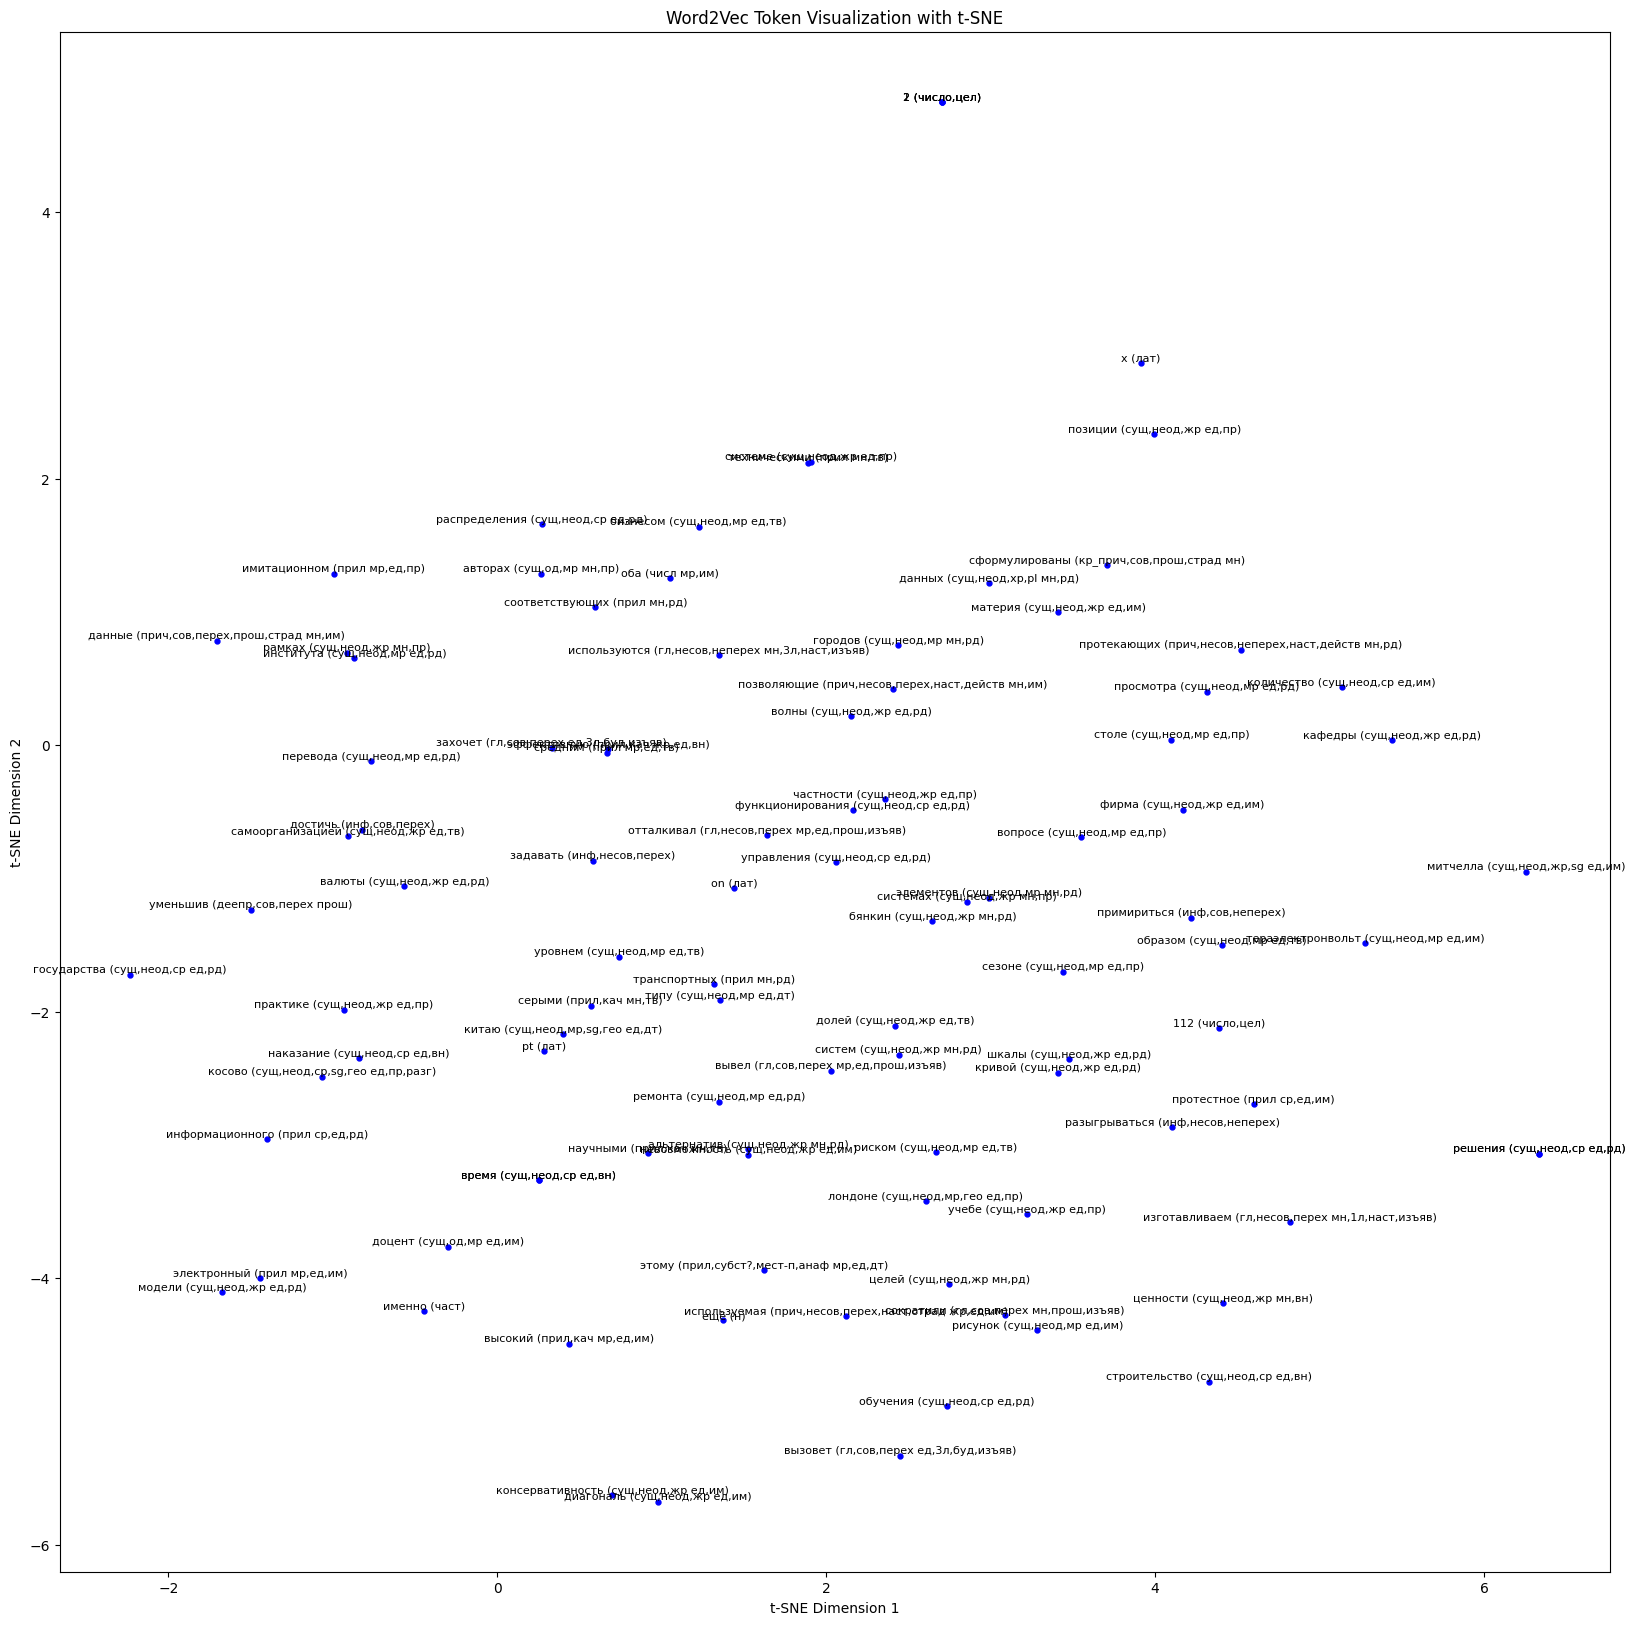

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
scatter = ax.scatter(embedded[:, 0], embedded[:, 1], c='b', marker='.', s=50)

font_size = 8  # Размер шрифта
# Добавление названий токенов и их частей речи
for i, token in enumerate(random_tokens):
    pos = get_pos_from_token(token)  # Функция для получения части речи из токена
    # ax.annotate(f"{token} ({pos})", (embedded[i, 0], embedded[i, 1]), fontsize=font_size)
    ax.annotate(f"{token} ({pos})", (embedded[i, 0], embedded[i, 1]), fontsize=font_size, ha='center', va='bottom')
    # ax.arrow(embedded[i, 0], embedded[i, 1], 0, 0, head_width=0.2, head_length=2, fc='black', ec='black')
    # ax.plot([embedded[i, 0], embedded[i, 0]], [embedded[i, 1], embedded[i, 1]], 'k--', linewidth=0.5)  # Линия-связь

# Установка меток осей и заголовка графика
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word2Vec Token Visualization with t-SNE')

plt.show()